In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import mock_ledger
from  desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask
import matplotlib.pyplot as plt
from astropy.table import join,Table

In [3]:
import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
from S4Mock_io import read_mxxl
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

nside=32
orig_density_per_deg = 2500
pixel_area = hp.nside2pixarea(nside,degrees=True)

In [4]:
mxxl = S4Mock_io.read_mxxl(small=True)
small_pix_list = np.unique(mxxl['HPX'].data)

In [5]:
t = mock_ledger.create_mock_ledger_hp(outdir=None, healpix = small_pix_list[0], nside=32, mxxl=mxxl,overwrite=False)

"""
for i in range(1,len(small_pix_list)):
    new_t = mock_ledger.create_mock_ledger_hp(outdir=None, healpix = small_pix_list[i], nside=32, mxxl=None, small=False, overwrite=False)
    t = join(t,new_t,join_type='outer')
    
"""

npix: 12288; pixel_area: 3.357174580844667 for nside: 32
Selected 0.792 as BGS Bright
Check: 0.047


"\nfor i in range(1,len(small_pix_list)):\n    new_t = mock_ledger.create_mock_ledger_hp(outdir=None, healpix = small_pix_list[i], nside=32, mxxl=None, small=False, overwrite=False)\n    t = join(t,new_t,join_type='outer')\n    \n"

In [6]:
t

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str25,str14,str30,int32,int64
9.569447734135013,0.6010957539787737,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382912,0.48601165480105213,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.141058620408897,0.15107645775122705,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382913,0.8348603329102995,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.521065103468043,0.5166643715818581,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230395097382914,0.8842210867534451,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.026973761313254,0.20669183426401636,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382915,0.8455880167201347,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.1467665387578,0.4665383018299413,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382916,0.05972463662708993,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.453895302120408,0.23065473605105238,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382917,0.490836658266258,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.445476685163495,0.22237751848947832,0.0,0.0,0.0,0.0,1152921504606846976,265,0,288230395097382918,0.2062092756820808,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.651116731572168,0.4570696612028132,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382919,0.5624144876929328,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
9.284578074208223,0.2646910647323876,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230395097382920,0.564185159403708,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [207]:
for name in desi_mask.names():
    print(name, np.count_nonzero((mock_faint['SV3_DESI_TARGET'] & desi_mask[name]) !=0))

LRG 0
ELG 0
QSO 0
LRG_LOWDENS 0
QSO_HIZ 0
ELG_LOP 0
ELG_HIP 0
LRG_NORTH 0
ELG_NORTH 0
QSO_NORTH 0
ELG_LOP_NORTH 0
ELG_HIP_NORTH 0
LRG_LOWDENS_NORTH 0
LRG_SOUTH 0
ELG_SOUTH 0
QSO_SOUTH 0
ELG_LOP_SOUTH 0
ELG_HIP_SOUTH 0
LRG_LOWDENS_SOUTH 0
SKY 0
STD_FAINT 0
STD_WD 0
STD_BRIGHT 0
BAD_SKY 0
SUPP_SKY 0
NO_TARGET 0
BRIGHT_OBJECT 0
IN_BRIGHT_OBJECT 0
NEAR_BRIGHT_OBJECT 0
BGS_ANY 321
MWS_ANY 0
SCND_ANY 0


In [208]:
for name in bgs_mask.names():
    print(name, np.count_nonzero((mock_faint['SV3_BGS_TARGET'] & bgs_mask[name] ) !=0))

BGS_FAINT 321
BGS_BRIGHT 0
BGS_WISE 0
BGS_FAINT_HIP 64
BGS_FAINT_NORTH 321
BGS_BRIGHT_NORTH 0
BGS_WISE_NORTH 0
BGS_FAINT_SOUTH 0
BGS_BRIGHT_SOUTH 0
BGS_WISE_SOUTH 0


In [180]:
mock_bright = t[((t['SV3_BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]
mock_faint = t[((t['SV3_BGS_TARGET'] & bgs_mask['BGS_FAINT']) != 0)]

In [ ]:
print(np.unique(mock_bright['SV3_DESI_TARGET'].data))
print(np.unique(mock_bright['SV3_BGS_TARGET'].data))

[1152921504606846976]
[514]


In [188]:
print(np.unique(mock_faint['SV3_DESI_TARGET'].data))
print(np.unique(mock_faint['SV3_BGS_TARGET'].data))

[1152921504606846976]
[257 265]


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


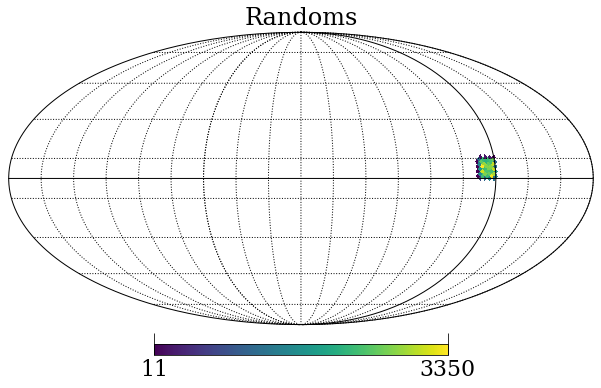

In [40]:
bright_target_pixel_density = geometry.targ_hpmap(mock_bright)

hp.mollview(bright_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

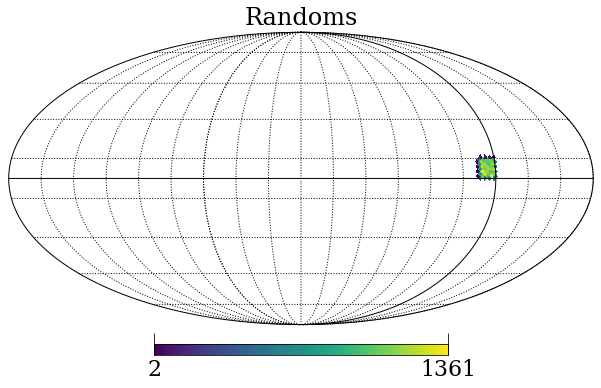

In [42]:
faint_target_pixel_density = geometry.targ_hpmap(mock_faint)
hp.mollview(faint_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

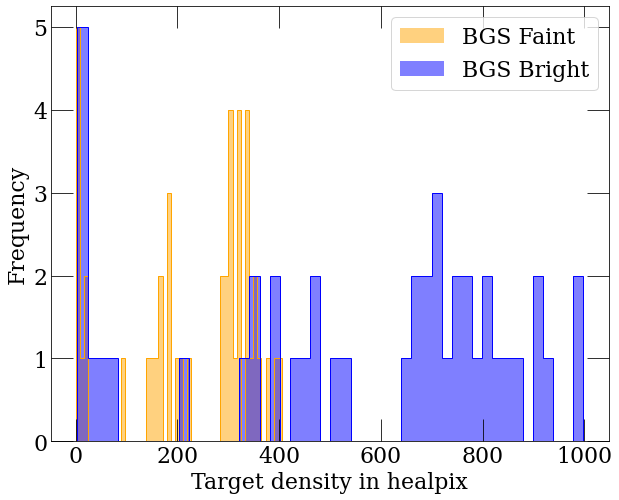

In [43]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,1560)
plt.ylabel('Frequency')
plt.legend()

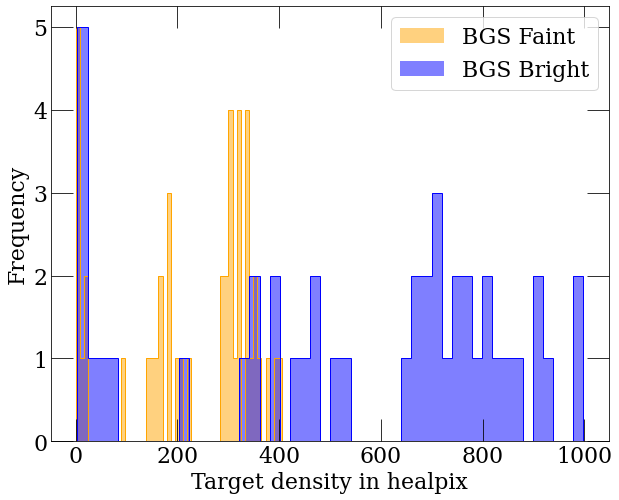

In [44]:
#repeating what did above but checking this other method 

mxxl = S4Mock_io.read_mxxl(small=True)
small_pix_list = np.unique(mxxl['HPX'].data)

mxxl_bright = mxxl[(mxxl['APP_MAG'] <= 19.5)]
mxxl_faint = mxxl[(mxxl['APP_MAG'] > 19.5) & (mxxl['APP_MAG'] <= 20.175)]

bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)
faint_target_pixel_density = geometry.targ_hpmap(mxxl_faint)

plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=50,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=50,histtype='step',color='blue')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,1560)
plt.ylabel('Frequency')
plt.legend()

In [253]:
mxxl = S4Mock_io.read_mxxl(small=False)

In [159]:
mxxl_bright = mxxl[(mxxl['APP_MAG'] <= 19.5952)]
mxxl_faint = mxxl[(mxxl['APP_MAG'] > 19.5952) & (mxxl['APP_MAG'] <= 20.003)]

In [140]:
bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)

In [141]:
np.percentile(bright_target_pixel_density,50)/pixel_area

859.9493206199688

In [160]:
faint_target_pixel_density = geometry.targ_hpmap(mxxl_faint)

In [161]:
np.percentile(faint_target_pixel_density,50)/pixel_area

540.9310586234373

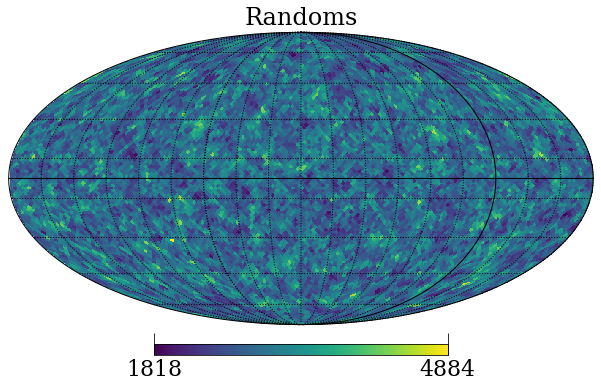

In [162]:
hp.mollview(bright_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

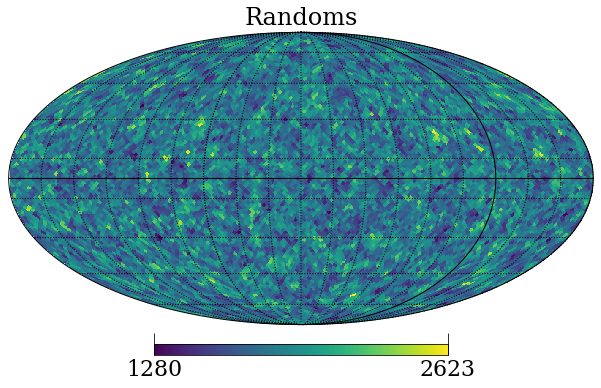

In [163]:
hp.mollview(faint_target_pixel_density,nest=True,rot=(120, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

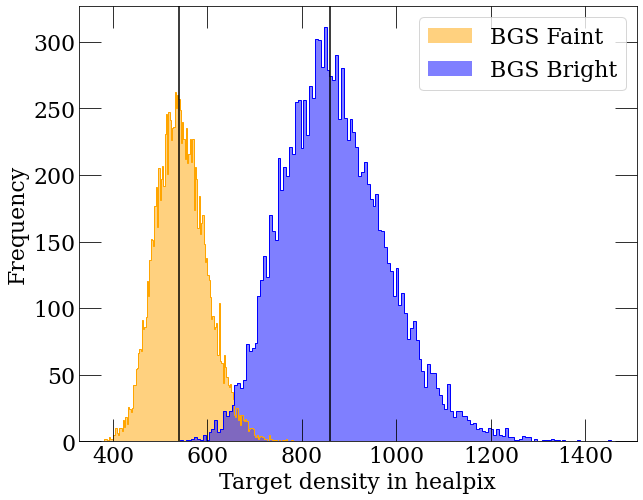

In [165]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

_ = plt.hist(faint_target_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.5,color='orange',label='BGS Faint')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=150,histtype='bar',alpha=0.5,color='blue',label='BGS Bright')
_ = plt.hist(faint_target_pixel_density/pixel_area, bins=150,histtype='step',color='orange')
_ = plt.hist(bright_target_pixel_density/pixel_area, bins=150,histtype='step',color='blue')
plt.axvline(x=540,color='black')
plt.axvline(x=860,color = 'black')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in healpix')
#plt.xlim(0,10000)
plt.ylabel('Frequency')
plt.legend()

In [258]:
bright_rlim = np.linspace(19.5,20,20)
bright_centre = []
faint_rlim = np.linspace(19.9,20.1,20)
faint_centre = []

for i in range(len(bright_rlim)):
    mxxl_bright = mxxl[(mxxl['APP_MAG'] <= bright_rlim[i])]
    bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)
    bright_centre.append(np.percentile(bright_target_pixel_density,50)/pixel_area)
    


In [ ]:
bright_rlim = np.linspace(19.5,20,20)
bright_centre = []

for i in range(len(bright_rlim)):
    mxxl_bright = mxxl[(mxxl['APP_MAG'] <= bright_rlim[i])]
    bright_target_pixel_density = geometry.targ_hpmap(mxxl_bright)
    bright_centre.append(np.percentile(bright_target_pixel_density,50)/pixel_area)

Text(0, 0.5, 'Bright target density')

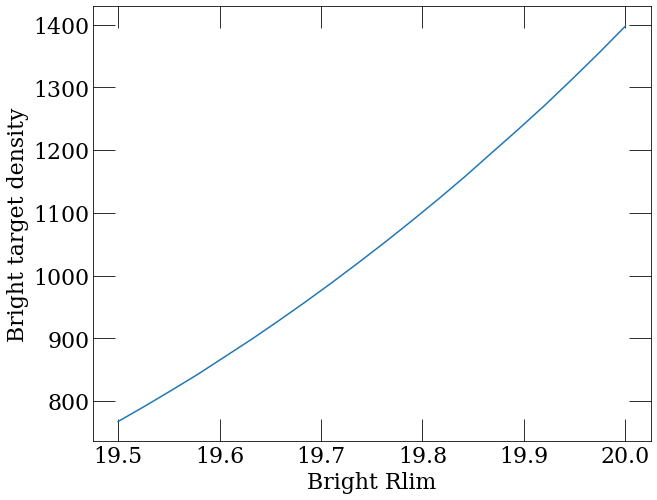

In [265]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

plt.plot(bright_rlim,bright_centre)
plt.xlabel('Bright Rlim')
plt.ylabel('Bright target density')

In [267]:
faint_rlim = np.linspace(19.9,20.1,20)
faint_centre = []

for i in range(len(bright_rlim)):
    mxxl_faint = mxxl[(mxxl['APP_MAG'] > 19.5952) & (mxxl['APP_MAG'] <= faint_rlim[i])]
    faint_target_pixel_density = geometry.targ_hpmap(mxxl_faint)
    faint_centre.append(np.percentile(faint_target_pixel_density,50)/pixel_area)

Text(0, 0.5, 'Faint target density')

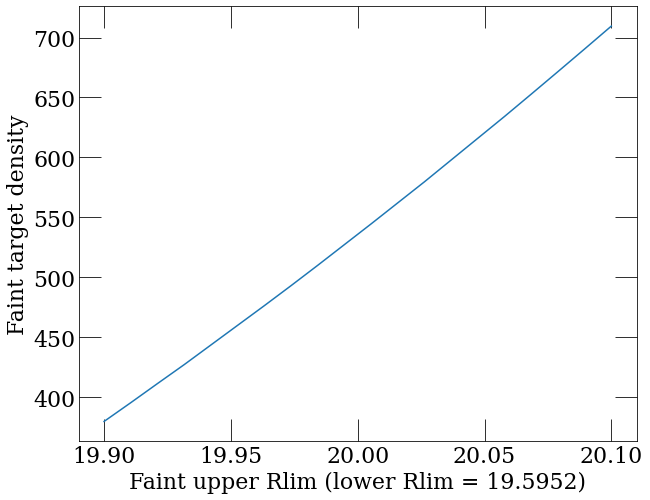

In [268]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(10,8))

plt.plot(faint_rlim,faint_centre)
plt.xlabel('Faint upper Rlim (lower Rlim = 19.5952)')
plt.ylabel('Faint target density')

In [ ]:
"""
Footnote 2 in Alex's PIP paper: In Section 2.4 we use rbright = 19.452 and rfaint = 19.925,
which in the BGS mock catalogue gives number densities of
818 deg−2 and 618 deg−2
"""

In [214]:
tiles     = S4Mock_io.read_sv3tiles()
hps       = geometry.radec2pix(tiles, unique=True)
small_pix_list = hps.data

In [215]:
small_pix_list

array([2335, 2455, 2457, 2459, 2460, 2462, 2480, 2538, 2551, 2559, 2600,
       2628, 2629, 2806, 2807, 2856, 3839, 6483, 6488, 6494, 6501, 6522,
       6569, 6741, 6814, 7029])

In [223]:
mxxl = S4Mock_io.read_mxxl(small=False)

In [233]:
mxxl1 = mxxl[np.in1d(mxxl['HPX'].data,small_pix_list)]

In [225]:
#mxxl1 = geometry.targ_hpmap(mxxl1)

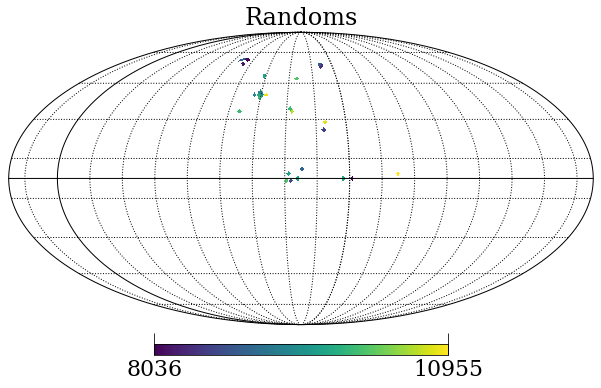

In [226]:
#hp.mollview(mxxl1,nest=True,rot=(210, 0.0, 0.0), badcolor='white',title='Randoms')
#hp.graticule(dpar=5, dmer=5)

In [249]:
#now actually create initial mock!

for i in range(len(small_pix_list)):
    t = mock_ledger.create_mock_ledger_hp(outdir='/global/cscratch1/sd/mjwilson/altmtls/ledger/initial', healpix=small_pix_list[i], nside=32, mxxl=read_mxxl(small=False),overwrite=False)


npix: 12288; pixel_area: 3.357174580844667 for nside: 32
Selected 0.341 as BGS Bright
Check: 0.040
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3mtl-bright-hp-2335.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3zs-bright-hp-2335.ecsv
npix: 12288; pixel_area: 3.357174580844667 for nside: 32
Selected 0.300 as BGS Bright
Check: 0.038
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3mtl-bright-hp-2455.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3zs-bright-hp-2455.ecsv
npix: 12288; pixel_area: 3.357174580844667 for nside: 32
Selected 0.283 as BGS Bright
Check: 0.042
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3mtl-bright-hp-2457.ecsv
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3zs-bright-hp-2457.ecsv
npix: 12288; pixel_area: 3.357174580844667 for nside: 32
Selected 0.297 as BGS Bright
Check: 0.038
Writing /global/cscratch1/sd/mjwilson/altmtls/ledger/initial/sv3mtl-bright-hp-2